In [1]:
import os
import sys
import librosa
import scipy
import scipy.signal as sig
import scipy.io.wavfile as scw
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Read audio file
long_sample = os.path.join('speech_sample', 'cut_s_1.wav')
short_sample = os.path.join('speech_sample', 'cut_l_1.wav')

rate_s, data_s = scipy.io.wavfile.read(long_sample)
rate_l, data_l = scipy.io.wavfile.read(short_sample)


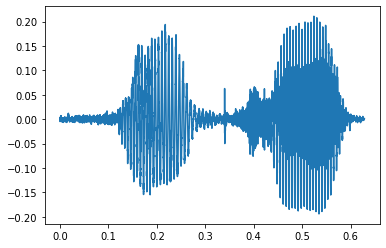

In [3]:
#Create an array of vertical axis (amplitude)
#Normalize 16-bit audio file data from -1 to 1
data_s = data_s / 32768

#Create an array on the horizontal axis (time)
#np.arange (first term, arithmetic progression end point, arithmetic progression)
time_s = np.arange(0, data_s.shape[0]/rate_s, 1/rate_s)  

#data plot
plt.plot(time_s, data_s)
plt.show()

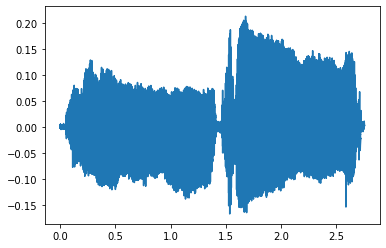

In [4]:
#Create an array of vertical axis (amplitude)
#Normalize 16-bit audio file data from -1 to 1
data_l = data_l / 32768

#Create an array on the horizontal axis (time)
#np.arange (first term, arithmetic progression end point, arithmetic progression)
time_l = np.arange(0, data_l.shape[0]/rate_l, 1/rate_l)  

#data plot
plt.plot(time_l, data_l)
plt.show()

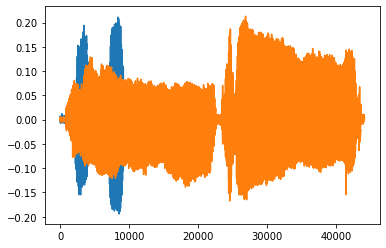

In [5]:
plt.plot(data_s)
plt.plot(data_l)
plt.show()

In [6]:
mse = lambda a,b: ((a-b)**2).mean()
first = lambda x: x[0]
second = lambda x: x[1]

def minVal(v1, v2, v3):
    if first(v1) <= min(first(v2), first(v3)):
        return v1, 0
    elif first(v2) <= first(v3):
        return v2, 1
    else:
        return v3, 2 

def calc_dtw(short_amp, long_amp):
    S = len(short_amp)
    T = len(long_amp)

    m = [[0 for j in range(T)] for i in range(S)]
    m[0][0] = (mse(short_amp[0],long_amp[0]), (-1,-1))
    for i in range(1,S):
        m[i][0] = (m[i-1][0][0] + mse(short_amp[i], long_amp[0]), (i-1,0))
    for j in range(1,T):
        m[0][j] = (m[0][j-1][0] + mse(short_amp[0], long_amp[j]), (0,j-1))

    for i in range(1,S):
        for j in range(1,T):
            minimum, index = minVal(m[i-1][j], m[i][j-1], m[i-1][j-1])
            indexes = [(i-1,j), (i,j-1), (i-1,j-1)]
            m[i][j] = (first(minimum)+mse(short_amp[i], long_amp[j]), indexes[index])
    return m


def correnspondence(m):
    path = []
    path.append([len(m)-1, len(m[0])-1])
    while True:
        path.append(m[path[-1][0]][path[-1][1]][1])
        if path[-1]==(0,0):
            break
    path = np.array(path)
    return path

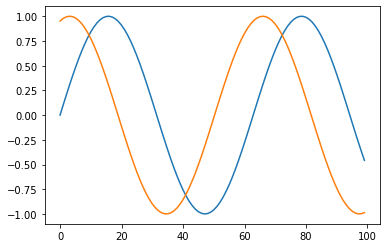

In [7]:
T = 100
t = .4

A = np.sin(np.array(range(T))/10)
B = np.sin((np.array(range(T))/10 + t*np.pi))

plt.plot(A)
plt.plot(B)
plt.show()

wave distance:  5.861800624334972


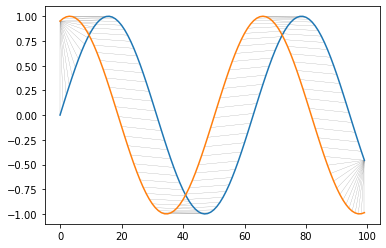

In [9]:
dist = calc_dtw(A, B)
print("wave distance: ", dist[-1][-1][0])

path = correnspondence(dist)
for line in path:
    plt.plot(line, [A[line[0]], B[line[1]]], linewidth=0.2, c="gray")
plt.plot(A)
plt.plot(B)
plt.show()

# Existing function

In [6]:
from dtw import dtw
from fastdtw import fastdtw

def l2_norm(x, y):
    return (x - y) ** 2

In [11]:
dist, cost_matrix, acc_cost_matrix, path = dtw(A, B, dist=l2_norm)

print("dist:", dist)
print("cost_matrix:", cost_matrix)
print("acc_cost_matrix:", acc_cost_matrix)
print("path:", path)

dist: 9.673716299718745
cost_matrix: [[0.9045085  0.95483271 0.98702418 ... 0.06057445 0.11672589 0.18815726]
 [0.72458077 0.76969389 0.79862371 ... 0.11968291 0.19490911 0.28473364]
 [0.56608648 0.60604059 0.63174133 ... 0.19783645 0.29194682 0.39998074]
 ...
 [0.01109013 0.01726822 0.02182831 ... 1.19217048 1.40991528 1.63716581]
 [0.02650529 0.03568448 0.04212298 ... 1.06992302 1.27668253 1.49334031]
 [0.05206391 0.0646553  0.07322953 ... 0.93896122 1.13323062 1.3378446 ]]
acc_cost_matrix: [[  0.9045085    1.85934121   2.84636538 ...  74.25834122  74.37506711
   74.56322436]
 [  1.62908926   1.67420239   2.4728261  ...  70.6922617   70.88717081
   71.17190445]
 [  2.19517574   2.23512985   2.30594372 ...  67.81774199  68.10968881
   68.50966955]
 ...
 [180.02321294 180.02786585 180.03242595 ...   8.69179987  10.10171515
   11.73888096]
 [180.04971823 180.05889742 180.06998883 ...   7.94967589   9.22635842
   10.71969873]
 [180.10178213 180.11437353 180.13212695 ...   7.20264108   8.

In [9]:
distance, path = fastdtw(A, B, dist=l2_norm)

print("dist:", dist)
print("path:", path)

dist: 9.673716299718745
path: [(0, 0), (1, 0), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 1), (15, 2), (16, 3), (17, 4), (18, 5), (19, 6), (20, 7), (21, 8), (22, 9), (23, 10), (24, 11), (25, 12), (26, 13), (27, 14), (28, 15), (29, 16), (30, 17), (31, 18), (32, 19), (33, 20), (34, 21), (35, 22), (36, 23), (37, 24), (38, 25), (39, 26), (40, 27), (41, 28), (42, 29), (43, 30), (44, 31), (45, 32), (46, 33), (47, 34), (48, 35), (49, 36), (50, 37), (51, 38), (52, 39), (53, 40), (54, 41), (55, 42), (56, 43), (57, 44), (58, 45), (59, 46), (60, 47), (61, 48), (62, 49), (63, 50), (64, 51), (65, 52), (66, 53), (67, 54), (68, 55), (69, 56), (70, 57), (71, 58), (72, 59), (73, 60), (74, 61), (75, 62), (76, 63), (77, 64), (78, 65), (79, 66), (80, 67), (81, 68), (82, 69), (83, 70), (84, 71), (85, 72), (86, 73), (87, 74), (88, 75), (89, 76), (90, 77), (91, 78), (92, 79), (93, 80), (94, 81), (95, 82), (96, 83), (97, 84), (98, 85), (99, 86), (1